# Лабораторная работа

В рамках данной лабораторной работы мы с вами реализуем сверточную нейронную сеть с необходимыми слоями и активациями с помощью библиотеки NumPy. 

В данном ноутбуке вы найдете частично готовый к применению код, некоторые элементы которого пропущены и вместо них стоит заглушка "\<ENTER YOUR CODE HERE>". Это означает, что вместо этой заглушки вам необходимо написать собственный код, решающий какую-то конкретную подзадачу. Детали вы найдете в комментариях около каждого из таких мест.  

Давайте убедимся, что у нас установлены все необходимые библиотеки.

In [ ]:
#!pip install numpy matplotlib Pillow

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from PIL import Image

Для экспериментов мы будем использовать стандартное тестовое изображение, применяемое в научных работах для проверки и иллюстрации алгоритмов обработки изображений - оцифрованный портрет шведской модели Лены Сёдерберг.  

Вместе с данным ноутбуком должно присутствовать данное изображение. В случае его отсутствия вы можете использовать любое изображение 128х128 пикселей.

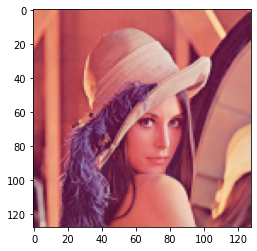

In [104]:
test_image = Image.open("Lenna.png")
test_image = np.array(test_image)
plt.imshow(test_image)

In [ ]:
test_image.shape

(128, 128, 3)

Как вы можете помнить из лекций, сверточный слой представляет собой несколько фильтров, применяемых к тензору. В общем случае сверткой называется обработка и суммирование полученных значений после применения этого фильтра, она может быть любой размерности. В данном ноутбуке мы реализуем стандартную двумерную свертку, предназначенную для работы с двумерными изображениями.  

Фильтр для двумерной свертки представляет собой трехмерный тензор размера NxMxD, где D - это глубина входного тензора, а N и M - размеры ядра свертки (kernel). Фильтр содержит веса, с которыми необходимо взять соответствующие пиксели входного изображения, а затем сложить и добавить bias для получения суммарного значения. После этого фильтр сдвигается на шаг сдвига (stride) и снова применяется к части входного тензора.

Как можно заметить, на каждом шаге свертки фильтр работает с частью двумерного изображения, но при этом обрабатывает все его каналы. Т.о. движение происходит только в двух плоскостях, поэтому свертка является двумерной. В случае трехмерной свертки фильтр будет покрывать лишь часть каналов изображения и двигаться в трехмерном пространстве (т.е. в пространстве каналов тоже). Т.к. в случае двумерных изображений все каналы одного пикселя взаимосвязаны, их отдельная обработка трехмерными свертками обычно нецелесообразна.  

Итого алгоритм работы сверточного слоя выглядит следующим образом: фильтр применяется (последовательно или параллельно - не имеет значения) к всем частям тензора и полученное значение записывается в ячейку нового сгенерированного тензора. Стоит отметить, что т.к. все операции являются дифференцируемыми, достаточно просто автоматическими методами реализовать градиентный спуск для данного слоя (хотя делать это мы с вами не будем).  

Важными параметрами сверточого слоя являются следующие параметры:
- kernel (ядро свертки) - параметры N и M, определяющие размер части входного тензора, к которой применяется фильтр, а также размер самого фильтра
- stride (шаг сдвига) - разница между центрами приложения фильтров к входному тензору
- feaures (количество фильтров) - т.к. каждый фильтр является небольшим массивом данных, он обладает небольшой запоминающей способностью. Для нивелирования этой проблемы фильтров может быть создано несколько (обычно - десятки и сотни), их применение возможно параллельно и дает преимущество в распределении хранения полезной информации о изображении. Количество фильтров в сверточном слое определяет глубину тензора (т.е. размерность D) после применения свертки.
- padding (дополнение) - т.к. применение свертки уменьшает размер изображения в пространствах M и N, по желанию можно применять padding - дополнение нулями (или другими значениями, например - зеркально отображенной часть изображения) для того, чтобы сохранить размерности M и N. В данной работе padding всегда будем считать равным нулю и смиримся с уменьшением размера изображения.

Для того, чтобы реализовать в будущем необходимые слои, мы создали для вас базовый класс слоя, который вам необходимо использовать. Данный класс имеет 3 метода:
- \_\_init__ - метода для инициализации слоя, его можно перегружать для передачи и сохранения различных параметров
- \_\_call__ - магический метод для вызова слоя, его сигнатуру изменять нельзя. Метод принимает часть изображения (размера NxMxD) и возвращает новый массив данных после обработки
- output_features - метод, возвращающий количество каналов (т.е. измерение D) после обработки метода \__call__. Предназначен для корректной инициализации массива для хранения результатов данного слоя

In [ ]:
class MyLayer:
    def __init__(self, *args):
        pass
    
    def __call__(self, patch: np.ndarray) -> np.ndarray:
        pass
    
    def output_features(self) -> int:
        pass

В процессе работы нам с вами понадобится вычислять форму тензора после обработки его сверточным (или аналогичным слоем). Зная, как реализован алгоритм сверточного слоя и подразумевая, что все реализованные нами слои в данной работе будут следовать этому принципу, реализуйте функцию, которая будет принимать на вход форму входного тензора, kernel, stride, и количество фильтров, и возвращать форму тензора после применения слоя с такими параметрами.  

Мы рекомендуем вам внимательно повторить материал лекции для реализации данной функции. Стоит отметить, что в некоторых других фреймворках (например, PyTorch) данная функци очень полезна и необходима, т.к. (в отличие от TensorFlow) вам необходимо знать формы входных тензоров для всех слоев, а не только для первого.  

Напомним, что паддинг в данной лабораторной работе всегда считаем равным нулю и не используем.

In [ ]:
def conv_shape_after(shape: Tuple[int, int, int], kernel: Tuple[int, int], stride: int, features: int) -> Tuple[int, int, int]:
    """
    Функция возвращает форму выходного тензора после применения слоя с указанными параметрами
    :param shape: входная форма тензора
    :param kernel: размер ядра свертки (NxM, где N - строки, а M - столбцы)
    :param stride: размер шага сдвига
    :param features: количество фильтров свертки
    :return: форму выходного тензора
    """
    
    return int((shape[0] - kernel[0]) / stride) + 1, int((shape[1] - kernel[1]) / stride) + 1, features

In [ ]:
# Код для проверки корректности работы функции
assert conv_shape_after((7, 7, 12), (3, 3), 2, 6) == (3, 3, 6)
assert conv_shape_after((40, 64, 1), (3, 3), 1, 3) == (38, 62, 3)

Далее нам сразу необходимо реализовать достаточно сложный момент. Мы с вами создадим функцию, которая будет принимать на вход тензор, инициированный слой, а также значения kernel и stride и применять данный слой к тензору с учетом ядра свертки и шага сдвига.  

Данная функция, фактически, реализует основу применения фильтра к изображению.


In [ ]:
def apply_layer(input_object: np.ndarray, layer: MyLayer, kernel: Tuple[int, int] = (3, 3), stride: int = 1):
    """
    Данная функция выполняет свертку с указанными параметрами указанного слоя к указанному тензору
    
    :param input_object: входной тензор
    :param layer: слой свертки, вызываемый от частей входного тензора
    :param kernel: размер ядра свертки
    :param stride: шаг сдвига
    :return: новый тензор после применения свертки
    """
    
    # В первую очередь необходимо определить размер выходного тензора
    # Определите глубину выходного слоя. Помните, что он зависит от слоя
    output_features = layer.output_features()
    
    # Далее определите полную форму выходного слоя с учетом знания формы входного слоя и всех необходимых параметров
    new_shape = conv_shape_after(input_object.shape, kernel, stride, output_features)
    
    # И создайте новый массив, который будет хранить выходное изображение
    result = np.empty(new_shape)
    
    # Далее последовательно с помощью вызова layer(...) от частей изображения примените свертку и создайте выходной тензор
    for i in range(new_shape[0]):
        for j in range(new_shape[1]):
            result[i,j,:] = layer(input_object[i*stride:i*stride+kernel[0], j*stride:j*stride+kernel[1], :])
            pass

    return result

Для проверки правильности свертки давайте создадим простой слой, который будет возвращать среднее всех значений всех пикселей во всех каналах в рамках данного ядра свертки

In [ ]:
class DummyLayer(MyLayer):
    def __call__(self, patch: np.ndarray) -> np.ndarray:
        return np.sum(patch) / patch.size
    
    def output_features(self) -> int:
        # Т.к. мы суммируем все каналы, глубина выходного изображения будет равна 1
        return 1

In [ ]:
# Код для тестирования функции apply_layer
test_array = np.ones((7, 9, 3))
test_array[3, 4] = 0.75
test_layer = DummyLayer()
test_kernel = (3, 3)
test_stride = 2
result = apply_layer(test_array, test_layer, test_kernel, test_stride)

assert result.shape == (3, 4, 1)
assert np.allclose(result, np.array([1., 1., 1., 1., 1., 0.97222222, 0.97222222, 1., 1., 1., 1., 1.]).reshape((3, 4, 1)))

Если код для тестирования выполнился успешно, давайте попробуем применить наш код к тестовом изображению и понаблюдать за результатом.

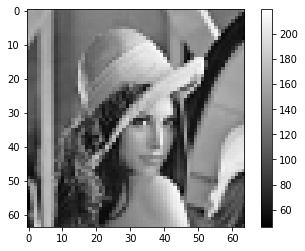

In [ ]:
test_result = apply_layer(test_image, test_layer, (2, 2), 2)
plt.imshow(test_result[:,:,0], cmap='gray')
plt.colorbar()

В случае корректной реализации функции мы с вами должны были получить тестовое изображение, в котором все каналы сложены друг с другом. Т.о. фотография будет в оттенках серого, однако в стандартном отображении pyplot используются сине-зеленые цвета как более удобные для восприятия. Вы можете изменить это с помощью передачи параметра cmap='gray'.  

Кроме того, изображение будет выглядеть немного размытым - это результат того, что мы усредняли пиксели в окне (3, 3). Попробуйте поставить большее или меньшее окно свертки и понаблюдайте за результатом. Также вы можете попробовать поставить ассиметричное окно свертки (значения по одному из измерений больше, чем по другому) и проверить, каков будет эффект на изображении.  

Кроме того, ответьте на вопрос - что будет при изменении параметра stride?

**При увеличении параметра stride картинка будет становиться менее качественная. Уже при stride = 2 на картинке невооруженным глазом видны границы пикселей.**

Если вы корректно справились с предыдущей частью, мы готовы приступить к реализации полноценного сверточного слоя. В данном слое мы будем реализовывать возможность использования более одного фильтра в рамках одного слоя. Т.о. в слое будет X фильтров размером NxMxD, соответственно, матрица весов такого слоя будет 4-х мерной (X, N, M, D). В процессе применения слоя мы будем брать каждый фильтр отдельно и применять к входному субтензору, а результат свертки записывать в соответствующий пиксель (в 3-хмерной терминологии - _воксель_).

Данный слой будет принимать при инициализации следующие параметры:
- features - количество фильтров, которые мы хотим хранить в данном слое
- weights - массив весов нейронов
- biases - массив смещений (biases) нейронов

Алгоритм свертки идентичен описанному в лекции - суммированию пикселей с соответствующими весами и добавлению смещения.

In [ ]:
class ConvolutionalLayer2D(MyLayer):
    def __init__(self, features: int, weights: np.ndarray, biases: np.ndarray):
        
        # Проверяем, что массив весов и смещений корректны
        assert len(weights.shape) == 4
        assert weights.shape[0] == len(biases) == features
        
        # Т.к. в biases будет храниться число смещений равное число фильтров, можем сделать данный массив одномерным
        assert biases.shape == (features,)
        
        self.features = features
        self.weights = weights
        self.biases = biases
    
    def __call__(self, patch: np.ndarray) -> np.ndarray:
        # проверяем, что входной тензор 3хмерный и равен по форме весам нейронов одного фильтра
        assert self.weights[0, :, :, :].shape == patch.shape
        
        # Создадим выходной тензор правильного размера
        output = np.empty(self.weights.shape[0])
        
        # Последовательно применим каждый фильтр
        for i in range(self.weights.shape[0]):
            # возьмем нужный фильтр
            weights_sublayer = np.sum(patch * self.weights[i]) + self.biases[i]
            
            # в правильное место выходного тензора запишем результат применения фильтра и смещения
            output[i] = weights_sublayer
        return output
    
    def output_features(self) -> int:
        return self.features

Давайте проверим правильность реализации сверточного слоя

In [ ]:
test_features = 1
test_weights = np.array([
    -1,  0,  1,  0,  0,  0,  0,  0,  1,
    -1, -1,  0, -1,  1, -1,  1,  1, -1,
    -1,  1,  0, -1,  1,  1,  1,  0,  1
]).reshape((1, 3, 3, 3))
test_biases = np.array([1])
test_layer = ConvolutionalLayer2D(test_features, test_weights, test_biases)

test_input = np.array([
    0, 0, 1, 2, 1, 1, 2, 2, 1,
    2, 1, 2, 0, 2, 2, 2, 2, 2,
    0, 0, 0, 0, 2, 1, 1, 2, 2
]).reshape((3, 3, 3))

test_kernel = (3, 3)
test_stride = 1
test_result = apply_layer(test_input, test_layer, test_kernel, test_stride)

assert test_result.shape == (1, 1, 1)
assert np.allclose(test_result, np.array(8.).reshape((1, 1, 1)))

Если тестовый код выполнился успешно, мы можем использовать наш сверточный слой для выделения граней на изображении. Сначала сделаем изображение черно-белым с помощью нашего предыдущего метода, а затем применим маски Собеля для поиска граней.  

Данный алгоритм (с масками Собеля) не является инструментом нейронных сетей, но работает по аналогичному принципу, вследствие чего является хорошим способом проверить корректность реализации. В случае правильной реализации вы должны увидеть выделенные грани изображения.

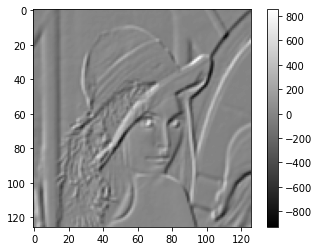

In [ ]:
# преобразование в черно-белое изображение
test_result = apply_layer(test_image, DummyLayer(), (1, 1), 1)

# маска Собеля
test_weights = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).reshape((1, 3, 3, 1))
test_layer = ConvolutionalLayer2D(1, test_weights, np.array([0]))
test_edges = apply_layer(test_result, test_layer, (3, 3), 1)

# вторая маска Собеля, результат прибавляем к предыдущему 
test_weights = np.array([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]]).reshape((1, 3, 3, 1))
test_layer = ConvolutionalLayer2D(1, test_weights, np.array([0]))
test_edges += apply_layer(test_result, test_layer, (3, 3), 1)


plt.imshow(test_edges[:,:,0], cmap='gray')
plt.colorbar()

Нейронная сеть использует градиентный спуск для того, чтобы обучить каждый из фильтров выполнять какую-то задачу - например, поиск граней, или прямых линий, или повторяющихся структур. Маски Собеля - это фильтр, созданный осознанно человеком и работающий ровно по тому же принципу. Нейросеть создает такие фильтры автоматически, подбирая их для максимальной пользы в работе над набором данных.  

Мы очень рекомендуем вам посмотреть визуализации фильтров по данной ссылке для оценки сложности фильтров нейронной сети: https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

---

Итак, к настоящему моменту мы с вами реализовали сверточный слой и функцию его применения. Давайте теперь реализуем функцию активации как слой - именно таким образом они реализованы в фреймворках глубокого обучения.  

Слой с функцией активации - это свертка размера 1х1, т.е. которая не смотрит на окрестности, а только на текущий пиксель. Учитывайте, что свертка смотрит сразу на все каналы, поэтому при ее реализации необходимо возвращать корректно число каналов - совпадающее с входным числом.  

Давайте с вами реализуем функцию активации ReLU. График и функцию данной активации мы можете поискать самостоятельно. Мы же реализуем ее в текущих условиях использования нашего фреймворка свертки.

In [48]:
class ReLULayer(MyLayer):
    # подумайте о том, нужны ли вам какие-то параметры при создании слоя
    # Подсказка: при создании слоя вы уже знаете некоторые параметры, с которыми он будет работать
    # При этом они полезны в процессе определения формы тензора
    def __init__(self, features: int):
        self.features = features
        pass
    
    def __call__(self, patch: np.ndarray) -> np.ndarray:
        # Реализуйте функцию ReLU
        return np.maximum(0, patch)
    
    def output_features(self) -> int:
        # Чему будет равно количество каналов?
        return self.features

In [49]:
test_layer = ReLULayer(None)
test_layer(np.array([1]))

array([1])

In [50]:
# Код для проверки ReLU слоя

# Использование None здесь некорректно в логическом смысле, но не вызовет синтаксической ошибки и не помешает в процессе выполнения кода
# В зависимости от вашей реализации слоя, вы можете изменить параметр None на конкретное значение
test_layer = ReLULayer(None)
assert np.allclose(test_layer(np.array([1])), np.array([1]))
assert np.allclose(test_layer(np.array([1, -1]).reshape((1, 1, 2))), np.array([[[1, 0]]]))

Если тестовый код выполнился успешно, мы можем использовать наш слой для очистки результата поиска граней на тестовом изображении. Маска Собеля присваивает отрицательные веса тем пикселям, на которых грани не обнаружены, и положительные там, где они есть. В случае, когда мы хотим оставить только положительные значения (грани), слой активации ReLU идеально подойдет для этого. Давайте применим его к предыдущему результату поиска граней.

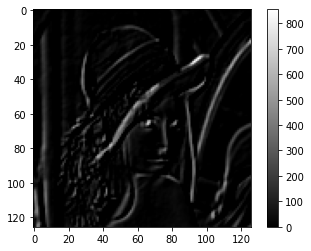

In [53]:
test_edges = apply_layer(test_edges, ReLULayer(1), (1, 1), 1)

plt.imshow(test_edges[:,:,0], cmap='gray')
plt.colorbar()

В случае правильной реализации вы должны увидеть выделенные грани и резкие переходы на изображении - как будто контуры нарисованы на графитовой доске.

---

Итак, к настоящему времени мы с вами реализовали сверточный слой и слой активации. Для полноценной работы сверточной нейронной сети нам необходимо еще реализовать слой пулинга.  

Слой пулинга подробно описан в лекционном материале. Задача данного слоя - уменьшить размерность изображения, оставив только самые значимые активации фильтра. Слой пулинга работает только в двумерном пространстве - т.е. количество слоев в глубину не изменится, пулинг будет производиться только в рамках одного слоя.  

Давайте реализуем слой пулинга в рамках нашего фреймворка.

In [63]:
class PoolingLayer(MyLayer):
    # Т.к. мы хотим знать глубину до применения слоя, сохраним выходную глубину в качестве параметра
    def __init__(self, features: int):
        self.features = features
    
    def __call__(self, patch: np.ndarray) -> np.ndarray:
        # вам необходимо вернуть максимум в рамках двух измерений, оставив глубину такой же
        # Данную операцию возможно реализовать одной правильно примененной операцией библиотеки NumPy
        pool = np.empty((1, 1, self.features))
        for i in range(self.features):
          pool[0, 0, i] = np.max(patch[:, :, i])
        return pool
    
    def output_features(self) -> int:
        return self.features

In [64]:
# Код для тестирования слоя пулинга
test_layer = PoolingLayer(4)

assert np.allclose(test_layer(np.arange(16).reshape((2, 2, 4), order='F')), np.array([[[ 3, 7, 11, 15]]]))
assert np.allclose(test_layer(np.arange(10, 42, 2).reshape((2, 2, 4), order='C')), np.array([[[34, 36, 38, 40]]]))

Если код для тестирования у вас выполнился успешно, мы можем проверить работу пулинг слоя на тестовом изображении.

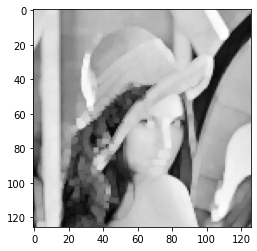

In [66]:
test_result = apply_layer(test_image, PoolingLayer(3), (3, 3), 1).astype(int)
plt.imshow(test_result[:,:,0], cmap='gray')

Т.к. пулинг слой находит максимальные значения не связывая слои логически, результат должен стать более ярким и слегка размытым - более высокие значения цветов размазываются по окружающему пространству и занимают его, плюс должна появиться некоторая пикселизация изображения.

---

Итак, если мы все правильно реализовали, мы можем попытаться собрать небольшую нейронную сеть из наших блоков.  

Давайте дополнительно зададим генератор случайных чисел для инициализации весов достаточно маленькими значениями (для отсутствия переполнений и удобства визуализации).

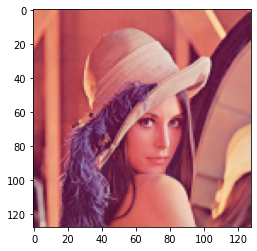

In [115]:
test_image = Image.open("Lenna.png")
test_image = np.array(test_image)
plt.imshow(test_image)

In [116]:
random_generator = lambda *args: np.random.randn(*args) * 0.1

Создание нашей сети выглядит следующим образом: мы зададим для каждого слоя kernel, stride, глубину до и после, создадим слой с этими параметрами и посчитаем выходную форму тензора после слоя. После этого создадим следующий слой, и т.д.  

Структуру сети давайте сделаем следующей: conv - relu - pool - conv2 - relu - pool2

In [117]:
# Создадим первый сверточный слой сети с 32-мя фильтрами
kernel1 = (5, 5)
features1 = 32
depth_before = 3
stride1 = 2
conv1 = ConvolutionalLayer2D(features1, random_generator(features1, *kernel1, depth_before), random_generator(features1))
shape_after = conv_shape_after(test_image.shape, kernel1, stride1, features1)
shape_after

(62, 62, 32)

In [118]:
# Добавим слой активации
activation_layer1 = ReLULayer(features1)
kernel_act1 = (1, 1)
stride_act1 = 1

In [119]:
# И пулинг слой
kernel_pool1 = (3, 3)
stride_pool1 = 2
pool1 = PoolingLayer(features1)
shape_after = conv_shape_after(shape_after, kernel_pool1, stride_pool1, features1)
shape_after

(30, 30, 32)

In [120]:
# Далее добавим второй сверточный слой с еще 32-мя фильтрами
kernel2 = (3, 3)
features2 = 32
depth_before = 32
stride2 = 1
conv2 = ConvolutionalLayer2D(features2, random_generator(features2, *kernel2, depth_before), random_generator(features2))
shape_after = conv_shape_after(shape_after, kernel2, stride2, features2)
shape_after

(28, 28, 32)

In [121]:
# Снова слой активации
activation_layer2 = ReLULayer(features2)
kernel_act2 = (1, 1)
stride_act2 = 1

In [122]:
# И снова пулинг слой
kernel_pool2 = (3, 3)
stride_pool2 = 1
pool2 = PoolingLayer(features2)
shape_after = conv_shape_after(shape_after, kernel_pool2, stride_pool2, features2)
shape_after

(26, 26, 32)

Соберем в списки наши слои и параметры

In [123]:
my_network = [
    conv1,
    activation_layer1,
    pool1,
    conv2,
    activation_layer2,
    pool2
]

kernels = [
    kernel1,
    kernel_act1,
    kernel_pool1,
    kernel2,
    kernel_act2,
    kernel_pool2
]

strides = [
    stride1,
    stride_act1,
    stride_pool1,
    stride2,
    stride_act2,
    stride_pool2
]

И применим их все к изначальному изображению, выполнив forward pass по нашей нейронной сети.

In [124]:
x = test_image
print(f"{x.shape}")

# forward pass
for i in range(6):
    x = apply_layer(x, my_network[i], kernels[i], strides[i])
    print(f"{x.shape}")

(128, 128, 3)
(62, 62, 32)
(62, 62, 32)
(30, 30, 32)
(28, 28, 32)
(28, 28, 32)
(26, 26, 32)


Если у вас успешно выполнился предыдущий код - поздравляем вас! Вы успешно реализовали нейронную сеть с помощью низкоуровневых средств программирония. В дальнейшей вы будете пользоваться уже написанными библиотеками и оптимизированными фреймворками, которые автоматизируют и предоставляют удобный интерфейс для данной работы, однако в данный момент мы надеемся, что у вас все получилось успешно.  

Давайте визуализируем полученный результат обработки случайным фильтром нашего тестового изображения - это то, как в самом начале своего обучения сверточная нейронная сеть видит результат обработки фильтром нашего тестового изображения.

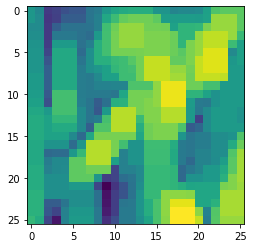

In [125]:
plt.imshow(x[:, :, 0])

Успехов!